📊 Total Profit by Category:
 Category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          285204.72380
Name: Profit, dtype: float64

📊 Total Profit by Sub.Category:
 Sub.Category
Copiers        258567.54818
Phones         216717.00580
Bookcases      161924.41950
Appliances     141680.58940
Chairs         140396.26750
Accessories    129626.30620
Storage        108461.48980
Binders         72449.84600
Paper           59207.68270
Machines        58867.87300
Art             57953.91090
Furnishings     46967.42550
Envelopes       29601.11630
Supplies        22583.26310
Labels          15010.51200
Fasteners       11525.42410
Tables         -64083.38870
Name: Profit, dtype: float64

🔥 Correlation Matrix:
              Sales  Quantity    Profit
Sales     1.000000  0.313580  0.484923
Quantity  0.313580  1.000000  0.104365
Profit    0.484923  0.104365  1.000000

📈 Monthly Sales Summary (First 12 Months):
 Month_Year
2011-01     98902
2011-02     91152
2011-03    14

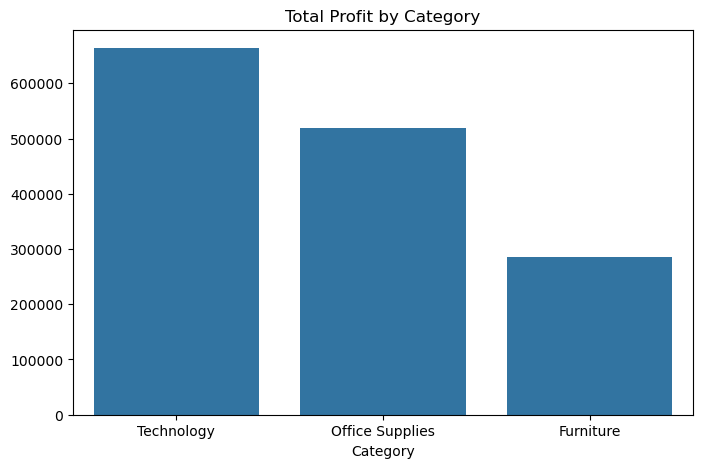

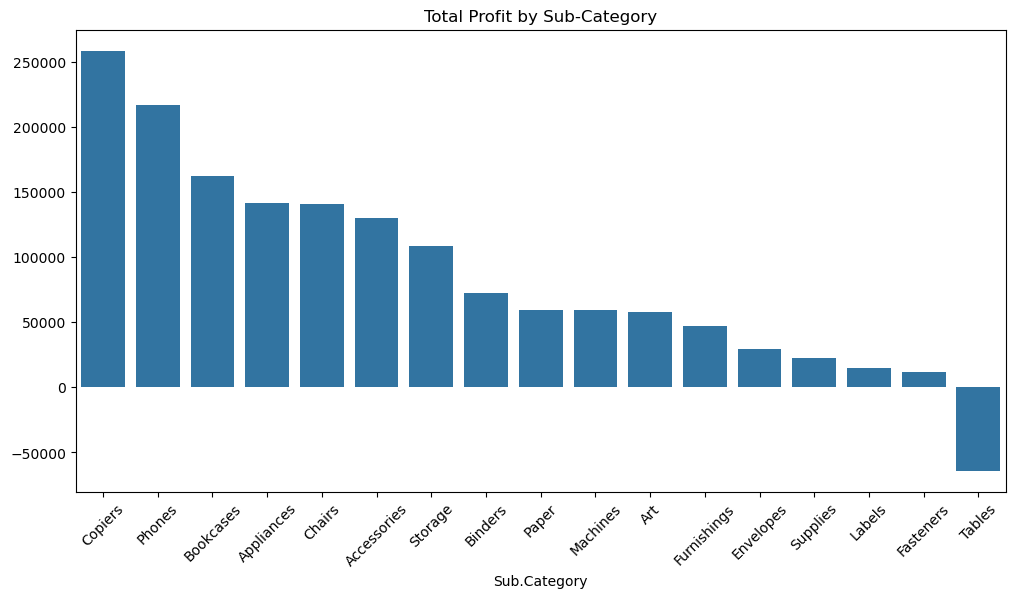

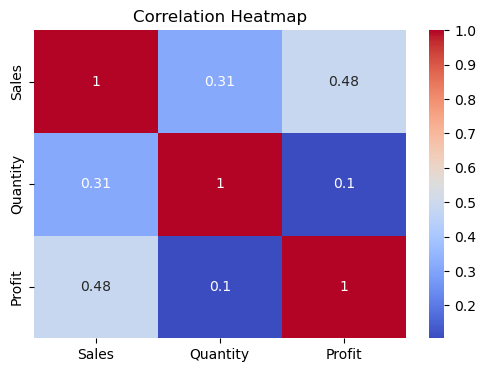

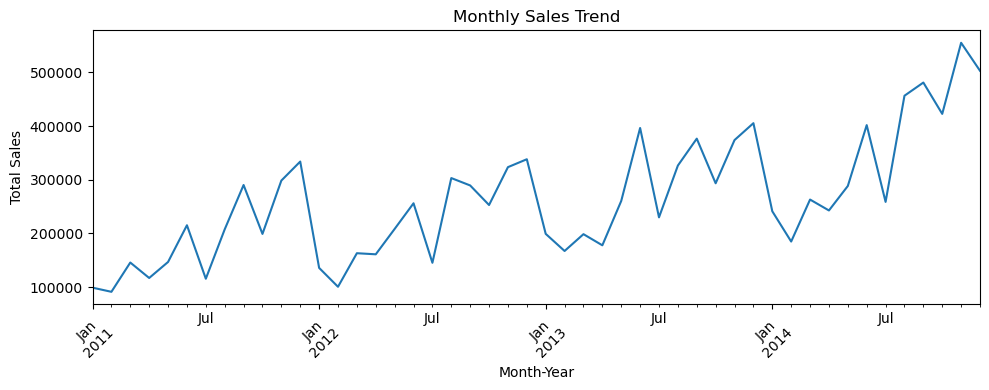

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\\Users\\dell\\OneDrive\\Desktop\\superstore.csv')

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Drop null values
df = df.dropna()

# Convert dates to datetime
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

# 1. Total Profit by Category
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("📊 Total Profit by Category:\n", category_profit)

# 2. Total Profit by Sub.Category
subcat_profit = df.groupby('Sub.Category')['Profit'].sum().sort_values(ascending=False)
print("\n📊 Total Profit by Sub.Category:\n", subcat_profit)

# 3. Correlation Heatmap
correlation = df[['Sales', 'Quantity', 'Profit']].corr()
print("\n🔥 Correlation Matrix:\n", correlation)

# 4. Monthly Sales Trend
df['Month_Year'] = df['Order.Date'].dt.to_period('M')
monthly_sales = df.groupby('Month_Year')['Sales'].sum()
print("\n📈 Monthly Sales Summary (First 12 Months):\n", monthly_sales.head(12))

# To show plots interactively (only if running in Jupyter or interactive environment)
# If running script in terminal, these will pop up windows (unless plt.close() is called)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title('Total Profit by Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=subcat_profit.index, y=subcat_profit.values)
plt.xticks(rotation=45)
plt.title('Total Profit by Sub-Category')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(10, 4))
monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
